### Codio Activity 14.1: Decision Trees with `sklearn`

**Expected Time = 60 minutes**

**Total Points = 50**

This activity introduces using the `DecisionTreeClassifier` from the `sklearn.tree` module.  You will build some basic models and explore hyperparameters available.  Using the results of the model, you will explore decision boundaries determined by the estimator. 

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

from sklearn import set_config

set_config("diagram")

### The Data

For this activity, you will again use the `penguins` data from seaborn.  You will target the two most important features to determining between `Adelie` and `Gentoo`.  

In [24]:
penguins = sns.load_dataset('penguins').dropna()

In [25]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [26]:
X = penguins.select_dtypes(['float'])
y = penguins.species

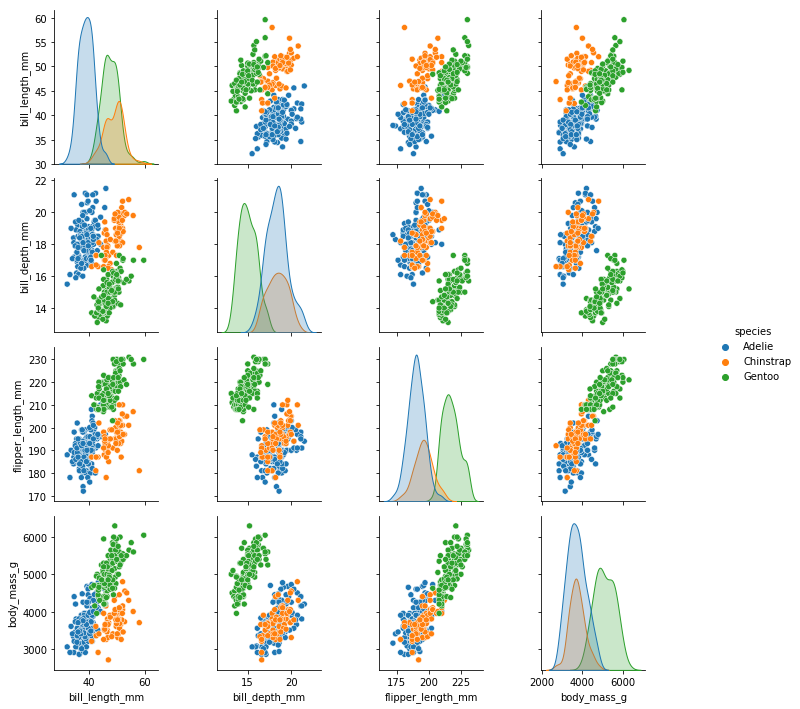

In [27]:
sns.pairplot(data = penguins, hue = 'species')

[Back to top](#-Index)

### Problem 1

#### Fitting a model

To being, build a `DecisionTreeClassifier` with the parameter `max_depth = 1`.  Fit the model on the training data and assign it to the variable `dtree` below.

**10 Points**



In [28]:
### GRADED

dtree = ''

### BEGIN SOLUTION
dtree = DecisionTreeClassifier(max_depth = 1).fit(X, y)
### END SOLUTION

# Answer check
print(dtree)

DecisionTreeClassifier(max_depth=1)


In [29]:
### BEGIN HIDDEN TESTS
dtree_ = DecisionTreeClassifier(max_depth = 1).fit(X, y)
#
#
#
assert type(dtree_) == type(dtree)
assert dtree.max_depth == dtree_.max_depth
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Examining the Decision

To examine a basic text representation of the fit tree, use the `export_text` function and set the argument `feature_names = list(X.columns)`.  

**10 Points**

In [30]:
### GRADED

depth_1 = ''

### BEGIN SOLUTION
depth_1 = export_text(dtree, feature_names = list(X.columns))
### END SOLUTION

### ANSWER CHECK
print(depth_1)

|--- flipper_length_mm <= 206.50
|   |--- class: Adelie
|--- flipper_length_mm >  206.50
|   |--- class: Gentoo



In [31]:
### BEGIN HIDDEN TESTS
depth_1_ = export_text(dtree_, feature_names = list(X.columns))
#
#
#
assert depth_1 == depth_1_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Two Features

**10 Points**

Now, to make it simpler to plot the boundaries the data is subset to `flipper_length_mm` and `bill_length_mm`.  Below, fit the model and assign the results of the tree with `export_tree` as `tree2` below.  Try replicating the image below using the information from the tree. (vertical and horizontal lines represent decision boundaries of tree)

<center>
    <img src = 'images/p3.png' />
</center>



In [32]:
### GRADED

X2 = X[['flipper_length_mm', 'bill_length_mm']]
dtree = ''
tree2 = ''

### BEGIN SOLUTION
dtree = DecisionTreeClassifier(max_depth = 2).fit(X2, y)
tree2 = export_text(dtree, feature_names = list(X2.columns))
### END SOLUTION

### ANSWER CHECK
print(tree2)

|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 43.35
|   |   |--- class: Adelie
|   |--- bill_length_mm >  43.35
|   |   |--- class: Chinstrap
|--- flipper_length_mm >  206.50
|   |--- bill_length_mm <= 40.85
|   |   |--- class: Adelie
|   |--- bill_length_mm >  40.85
|   |   |--- class: Gentoo



In [33]:
### BEGIN HIDDEN TESTS
X2_ = X[['flipper_length_mm', 'bill_length_mm']]
dtree_ = DecisionTreeClassifier(max_depth = 2).fit(X2_, y)
tree2_ = export_text(dtree_, feature_names = list(X2_.columns))
#
#
#
assert tree2 == tree2_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### Evaluating the tree

**10 Points**

Again, the default metric of the classifier is accuracy.  Evaluate the accuracy of the estimator `tree2` and assign as a float to `acc_depth_2` below.  As you see there are a few points misclassified in the image of the decision boundaries.

In [34]:
### GRADED

acc_depth_2 = ''

### BEGIN SOLUTION
acc_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X2, y).score(X2, y)
### END SOLUTION

### ANSWER CHECK
print(acc_depth_2)

0.9519519519519519


In [35]:
### BEGIN HIDDEN TESTS
acc_depth_2_ = DecisionTreeClassifier(max_depth=2).fit(X2, y).score(X2, y)
#
#
#
assert acc_depth_2 == acc_depth_2_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 5

#### A Deeper Tree

**10 Points**

Finally, consider a tree with `max_depth = 3`.  Print the results and and use them to decide a prediction for the following penguin:

| flipper length | bill length |
| ------------- | ------------  |
| 209 | 41.2 |

Assign your results as a string `Adelie`, `Chinstrap`, or `Gentoo` to `prediction` below.

In [36]:
### GRADED

prediction = ''

### BEGIN SOLUTION
prediction = 'Gentoo'
### END SOLUTION

# Answer check
print(prediction)

Gentoo


In [37]:
### BEGIN HIDDEN TESTS
prediction_ = 'Gentoo'
#
#
#
assert prediction == prediction_
### END HIDDEN TESTS